# Empirical Assigment

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

## Question 1

For Country A: $y_0 = 10000.0$ and $k_1 = 10500.0$.
For Country B: $y_0 = 7071.07$ and $k_1 = 5560.66$.
Magnitude of difference in year 0: 2928.93.
Magnitude of GDP per worker difference in year 50: 233.01.
Average annual growth rate for Country A: 0.0076. Average annual growth rate for Country B: 0.0143.
In both countries, GDP per worker is converging toward: 15000.0.


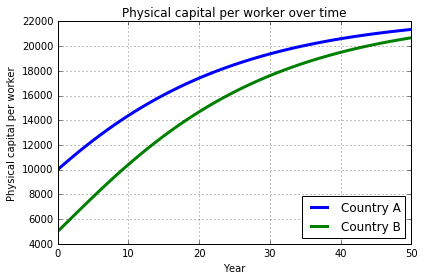

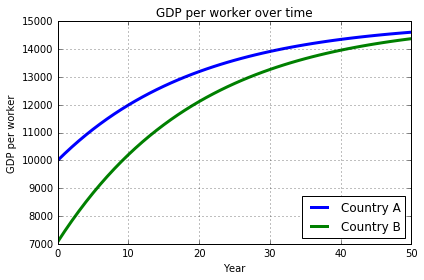

In [2]:

T = 51
kA0 = 10000
kB0 = 5000


aA = 100
sA = 0.15
dA = 0.1

aB = 100
sB = 0.15
dB = 0.1

kA = np.zeros(T)
kB = np.zeros(T)
yA = np.zeros(T)
yB = np.zeros(T)

kA[0] = kA0
kB[0] = kB0

for t in range(T-1):
    kA[t+1] = sA*aA*np.sqrt(kA[t]) + (1-dA)*kA[t]
    kB[t+1] = sB*aB*np.sqrt(kB[t]) + (1-dB)*kB[t]
    
yA = aA*np.sqrt(kA)
yB = aB*np.sqrt(kB)

ystar = aA*sA*aA/0.1


print('For Country A: $y_0 = '+str(round(yA[0],2))+'$ and $k_1 = '+str(round(kA[1],2))+'$.')
print('For Country B: $y_0 = '+str(round(yB[0],2))+'$ and $k_1 = '+str(round(kB[1],2))+'$.')

print('Magnitude of difference in year 0: '+str(round(np.abs(yB[0]-yA[0]),2))+'.')

print('Magnitude of GDP per worker difference in year 50: '+str(round(np.abs(yB[-1]-yA[-1]),2))+'.')

print('Average annual growth rate for Country A: '+str(round((yA[-1]/yA[0])**(1/(T-1))-1,4))+'. Average annual growth rate for Country B: '+str(round((yB[-1]/yB[0])**(1/(T-1))-1,4))+'.')
print('In both countries, GDP per worker is converging toward: '+str(round(ystar,4))+'.')


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(kA,lw=3,label='Country A')
ax.plot(kB,lw=3,label='Country B')
ax.set_title('Physical capital per worker over time')
ax.set_xlabel('Year')
ax.set_ylabel('Physical capital per worker')
ax.grid()
ax.legend(loc='lower right')

fig.tight_layout()
plt.savefig('Fig_SocSciH30D_Fall2018_Assignment1_Key_1di.png',bbox_inches='tight',dpi=120)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(yA,lw=3,label='Country A')
ax.plot(yB,lw=3,label='Country B')
ax.set_title('GDP per worker over time')
ax.set_xlabel('Year')
ax.set_ylabel('GDP per worker')
ax.grid()
ax.legend(loc='lower right')

fig.tight_layout()
plt.savefig('Fig_SocSciH30D_Fall2018_Assignment1_Key_1dii',bbox_inches='tight',dpi=120)

## Question 2

For Country A: $y_0 = 9486.83$ and $k_1 = 9238.42$.
For Country B: $y_0 = 7071.07$ and $k_1 = 5560.66$.
The first year that GDP per worker in Country B exceeds GDP per worker in Country A: 12.
Magnitude of GDP per worker difference in year 50: 1021.69.
Average annual growth rate for Country A: 0.0079. Average annual growth rate for Country B: 0.0273.
In both countries, GDP per worker is converging toward: 15000.0.


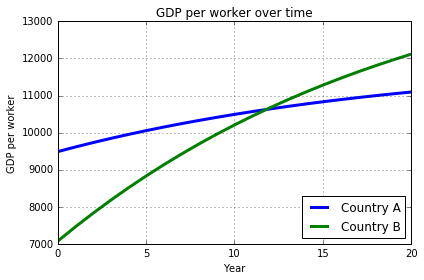

In [3]:
T = 21


kA0 = 9000
aA = 100
sA = 0.12
dA = 0.1


kB0 = 5000
aB = 100
sB = 0.15
dB = 0.1

kA = np.zeros(T)
kB = np.zeros(T)
yA = np.zeros(T)
yB = np.zeros(T)

kA[0] = kA0
kB[0] = kB0

for t in range(T-1):
    kA[t+1] = sA*aA*np.sqrt(kA[t]) + (1-dA)*kA[t]
    kB[t+1] = sB*aB*np.sqrt(kB[t]) + (1-dB)*kB[t]
    
yA = aA*np.sqrt(kA)
yB = aB*np.sqrt(kB)


for t in range(T):
    if yA[t]<yB[t]:
        tstar = t
        break
        

print('For Country A: $y_0 = '+str(round(yA[0],2))+'$ and $k_1 = '+str(round(kA[1],2))+'$.')
print('For Country B: $y_0 = '+str(round(yB[0],2))+'$ and $k_1 = '+str(round(kB[1],2))+'$.')

print('The first year that GDP per worker in Country B exceeds GDP per worker in Country A: '+str(tstar)+'.')

print('Magnitude of GDP per worker difference in year 50: '+str(round(np.abs(yB[-1]-yA[-1]),2))+'.')

print('Average annual growth rate for Country A: '+str(round((yA[-1]/yA[0])**(1/(T-1))-1,4))+'. Average annual growth rate for Country B: '+str(round((yB[-1]/yB[0])**(1/(T-1))-1,4))+'.')
print('In both countries, GDP per worker is converging toward: '+str(round(ystar,4))+'.')



fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(yA,lw=3,label='Country A')
ax.plot(yB,lw=3,label='Country B')
ax.set_title('GDP per worker over time')
ax.set_xlabel('Year')
ax.set_ylabel('GDP per worker')
ax.grid()
ax.legend(loc='lower right')

fig.tight_layout()
plt.savefig('Fig_SocSciH30D_Fall2018_Assignment1_Key_2c',bbox_inches='tight',dpi=120)

## Question 3

In [4]:
data = pd.read_excel('pwt90.xlsx',sheet_name='Data')
data = data[data['year']==2014]
data = data[['countrycode','country','cgdpo','emp','hc','ck']]
data.columns = ['country_code','country','gdp','labor','human_capital','physical_capital']
data = data.dropna()

data['gdp_pw'] = data.gdp/data.labor
data['physical_capital_pw'] = data.physical_capital/data.labor

alpha = 0.35
data['tfp'] = data.gdp_pw/data.physical_capital_pw**alpha/data.human_capital**(1-alpha)

# Explort data for assignment
data[['country_code','country','gdp','labor','human_capital','physical_capital']].to_csv('SocSciH30D_Fall2018_Assignment1.csv',index=False)


In [5]:
data=data.sort_values(by='gdp',ascending=False)

country_list = list(data[['country_code','country','gdp','gdp_pw']].head(10).country.values)
print('Countries with the highest GDP: '+', '.join(country_list)+'.\n')
country_list = list(data[['country_code','country','gdp','gdp_pw']].tail(10).country.values)
print('Countries with the lowest GDP: '+', '.join(country_list)+'.\n')

print(data.head(10).country)
print(data.tail(10).country)

Countries with the highest GDP: China, United States, India, Japan, Germany, Russian Federation, Brazil, France, United Kingdom, Indonesia.

Countries with the lowest GDP: Burundi, Sierra Leone, Fiji, Maldives, Lesotho, Liberia, Gambia, Central African Republic, Barbados, Belize.

2209                  China
11244         United States
5069                  India
5654                  Japan
3054                Germany
9164     Russian Federation
1624                 Brazil
3899                 France
4029         United Kingdom
5004              Indonesia
Name: country, dtype: object
779                      Burundi
9554                Sierra Leone
3834                        Fiji
7019                    Maldives
6499                     Lesotho
6304                     Liberia
4289                      Gambia
1949    Central African Republic
1689                    Barbados
1429                      Belize
Name: country, dtype: object


In [6]:
data=data.sort_values(by='gdp_pw',ascending=False)

country_list = list(data[['country_code','country','gdp','gdp_pw']].head(10).country.values)
print('Countries with the highest GDP per worker: '+', '.join(country_list)+'.\n')

country_list = list(data[['country_code','country','gdp','gdp_pw']].tail(10).country.values)
print('Countries with the lowest GDP per worker: '+', '.join(country_list)+'.\n')

print(data.head(10).country)
print(data.tail(10).country)

Countries with the highest GDP per worker: China, Macao SAR, Qatar, Norway, Brunei Darussalam, Kuwait, Ireland, Saudi Arabia, United States, Singapore, United Arab Emirates.

Countries with the lowest GDP per worker: Togo, Rwanda, Ethiopia, Mozambique, Madagascar, Liberia, Malawi, Niger, Burundi, Central African Republic.

6759         China, Macao SAR
9034                    Qatar
8254                   Norway
1754        Brunei Darussalam
6109                   Kuwait
5134                  Ireland
9294             Saudi Arabia
11244           United States
9489                Singapore
324      United Arab Emirates
Name: country, dtype: object
10464                        Togo
9229                       Rwanda
3704                     Ethiopia
7539                   Mozambique
6954                   Madagascar
6304                      Liberia
7799                       Malawi
7994                        Niger
779                       Burundi
1949     Central African Republic
Name: 

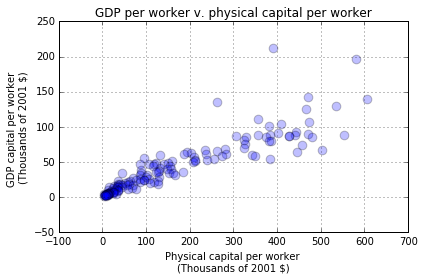

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data.physical_capital_pw/1000,data.gdp_pw/1000,s= 75,alpha = 0.25)
ax.set_title('GDP per worker v. physical capital per worker')
ax.set_xlabel('Physical capital per worker \n(Thousands of 2001 $)')
ax.set_ylabel('GDP capital per worker \n(Thousands of 2001 $)')
ax.grid()


fig.tight_layout()
plt.savefig('Fig_SocSciH30D_Fall2018_Assignment1_Key_3c',bbox_inches='tight',dpi=120)

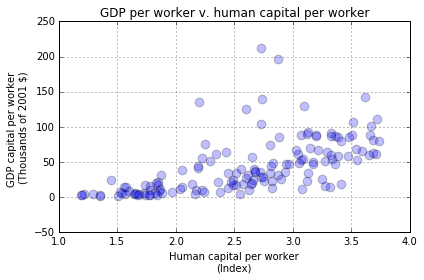

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data.human_capital,data.gdp_pw/1000,s= 75,alpha = 0.25)
ax.set_title('GDP per worker v. human capital per worker')
ax.set_xlabel('Human capital per worker\n(Index)')
ax.set_ylabel('GDP capital per worker \n(Thousands of 2001 $)')
ax.grid()


fig.tight_layout()
plt.savefig('Fig_SocSciH30D_Fall2018_Assignment1_Key_3d',bbox_inches='tight',dpi=120)

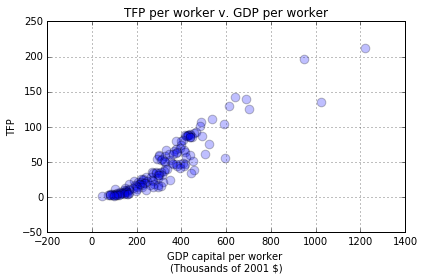

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data.tfp,data.gdp_pw/1000,s= 75,alpha = 0.25)
ax.set_title('TFP per worker v. GDP per worker')
ax.set_xlabel('GDP capital per worker \n(Thousands of 2001 $)')
ax.set_ylabel('TFP')
ax.grid()


fig.tight_layout()
plt.savefig('Fig_SocSciH30D_Fall2018_Assignment1_Key_3e',bbox_inches='tight',dpi=120)